<a href="https://colab.research.google.com/github/d11541df/d11541df/blob/yongjin/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv file/forestfires.csv', encoding= 'CP949', engine ='python')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
print(data.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [ ]:
data.shape

(517, 13)

In [ ]:
print(list(data.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False]


In [ ]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [ ]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:

data.rename(columns= {'month':'월', 
                      'day': "일", 
                      'FFMC': "미세연료지수", 
                      'DMC': "습도", 
                      'DC': "가뭄지수", 
                      'ISI': "바람지수", 
                      'temp': "기온", 
                      'RH': "습도",
                       'wind': "바람세기",
                     'rain': "강수량",
                      'area': "산불발생지역"},inplace =True)
                      

In [ ]:
data['산불발생지역'].values[data['산불발생지역'].values > 0] = 1
data

,X,Y,월,일,미세연료지수,습도,가뭄지수,바람지수,기온,습도,바람세기,강수량,산불발생지역
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [ ]:
data.corr()['산불발생지역'].sort_values(ascending=False)

산불발생지역    1.000000
월         0.130329
가뭄지수      0.096724
기온        0.076047
미세연료지수    0.073823
습도        0.062672
X         0.062491
Y         0.056892
바람세기      0.055702
바람지수      0.035663
강수량       0.025550
습도       -0.035587
일        -0.042970
Name: 산불발생지역, dtype: float64

In [ ]:
data.describe()

,X,Y,월,일,미세연료지수,습도,가뭄지수,바람지수,기온,습도,바람세기,강수량,산불발생지역
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,0.522244
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,0.499989
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,1.000000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,1.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1.000000


Accuracy (정확도): 0.48792270531400966
Precision(정밀도):: 0.5391304347826087
Recall(재현율): 0.5391304347826087


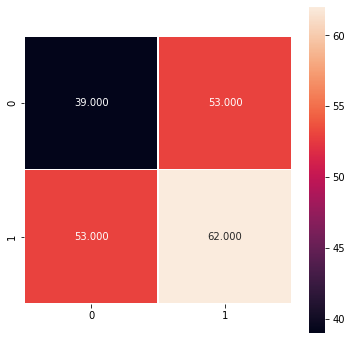

              precision    recall  f1-score   support

         0.0       0.42      0.42      0.42        92
         1.0       0.54      0.54      0.54       115

    accuracy                           0.49       207
   macro avg       0.48      0.48      0.48       207
weighted avg       0.49      0.49      0.49       207



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(data.drop('산불발생지역',axis=1))
scaled_features = scaler.transform(data.drop('산불발생지역',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

X = df_feat
y = data['산불발생지역']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=102)

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn import metrics
logmodel.score(X_train,y_train)
print("Accuracy (정확도):",metrics.accuracy_score(y_test, predictions))
print("Precision(정밀도)::",metrics.precision_score(y_test, predictions))
print("Recall(재현율):",metrics.recall_score(y_test, predictions))



conf_mat = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("")
plt.xlabel("")
plt.show()

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))





Accuracy (정확도): 0.5256410256410257
Precision(정밀도): 0.5354330708661418
Recall(재현율): 0.8192771084337349


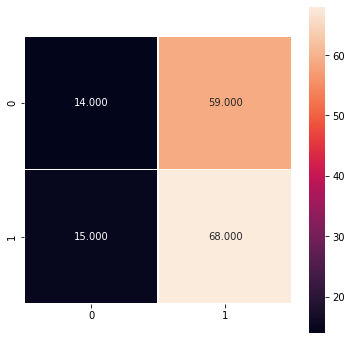

              precision    recall  f1-score   support

         0.0       0.48      0.19      0.27        73
         1.0       0.54      0.82      0.65        83

    accuracy                           0.53       156
   macro avg       0.51      0.51      0.46       156
weighted avg       0.51      0.53      0.47       156



In [ ]:
from sklearn import metrics
from sklearn.svm import SVC


X = data.drop('산불발생지역', axis=1)
y = data['산불발생지역']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=102)

SuppotvectorMachine = SVC()
SuppotvectorMachine.fit(X_train, y_train)

predictions = SuppotvectorMachine.predict(X_test)

print("Accuracy (정확도):",metrics.accuracy_score(y_test, predictions))
print("Precision(정밀도):",metrics.precision_score(y_test, predictions))
print("Recall(재현율):",metrics.recall_score(y_test, predictions))

conf_mat = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("")
plt.xlabel("")
plt.show()
print(metrics.classification_report(y_test, predictions))




Accuracy (정확도): 0.4551282051282051
Precision(정밀도): 0.4883720930232558
Recall(재현율):: 0.5060240963855421


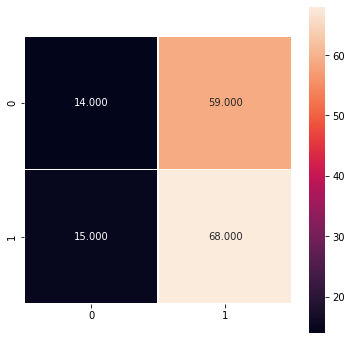

              precision    recall  f1-score   support

         0.0       0.41      0.40      0.41        73
         1.0       0.49      0.51      0.50        83

    accuracy                           0.46       156
   macro avg       0.45      0.45      0.45       156
weighted avg       0.45      0.46      0.45       156



In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier



X = data.drop('산불발생지역', axis=1)
y = data['산불발생지역']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=102)



decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


prediction = decision_tree.predict(X_test)

print("Accuracy (정확도):",metrics.accuracy_score(y_test, prediction))
print("Precision(정밀도):",metrics.precision_score(y_test, prediction))
print("Recall(재현율)::",metrics.recall_score(y_test, prediction))

conf_mat = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("")
plt.xlabel("")
plt.show()

print(metrics.classification_report(y_test, prediction))




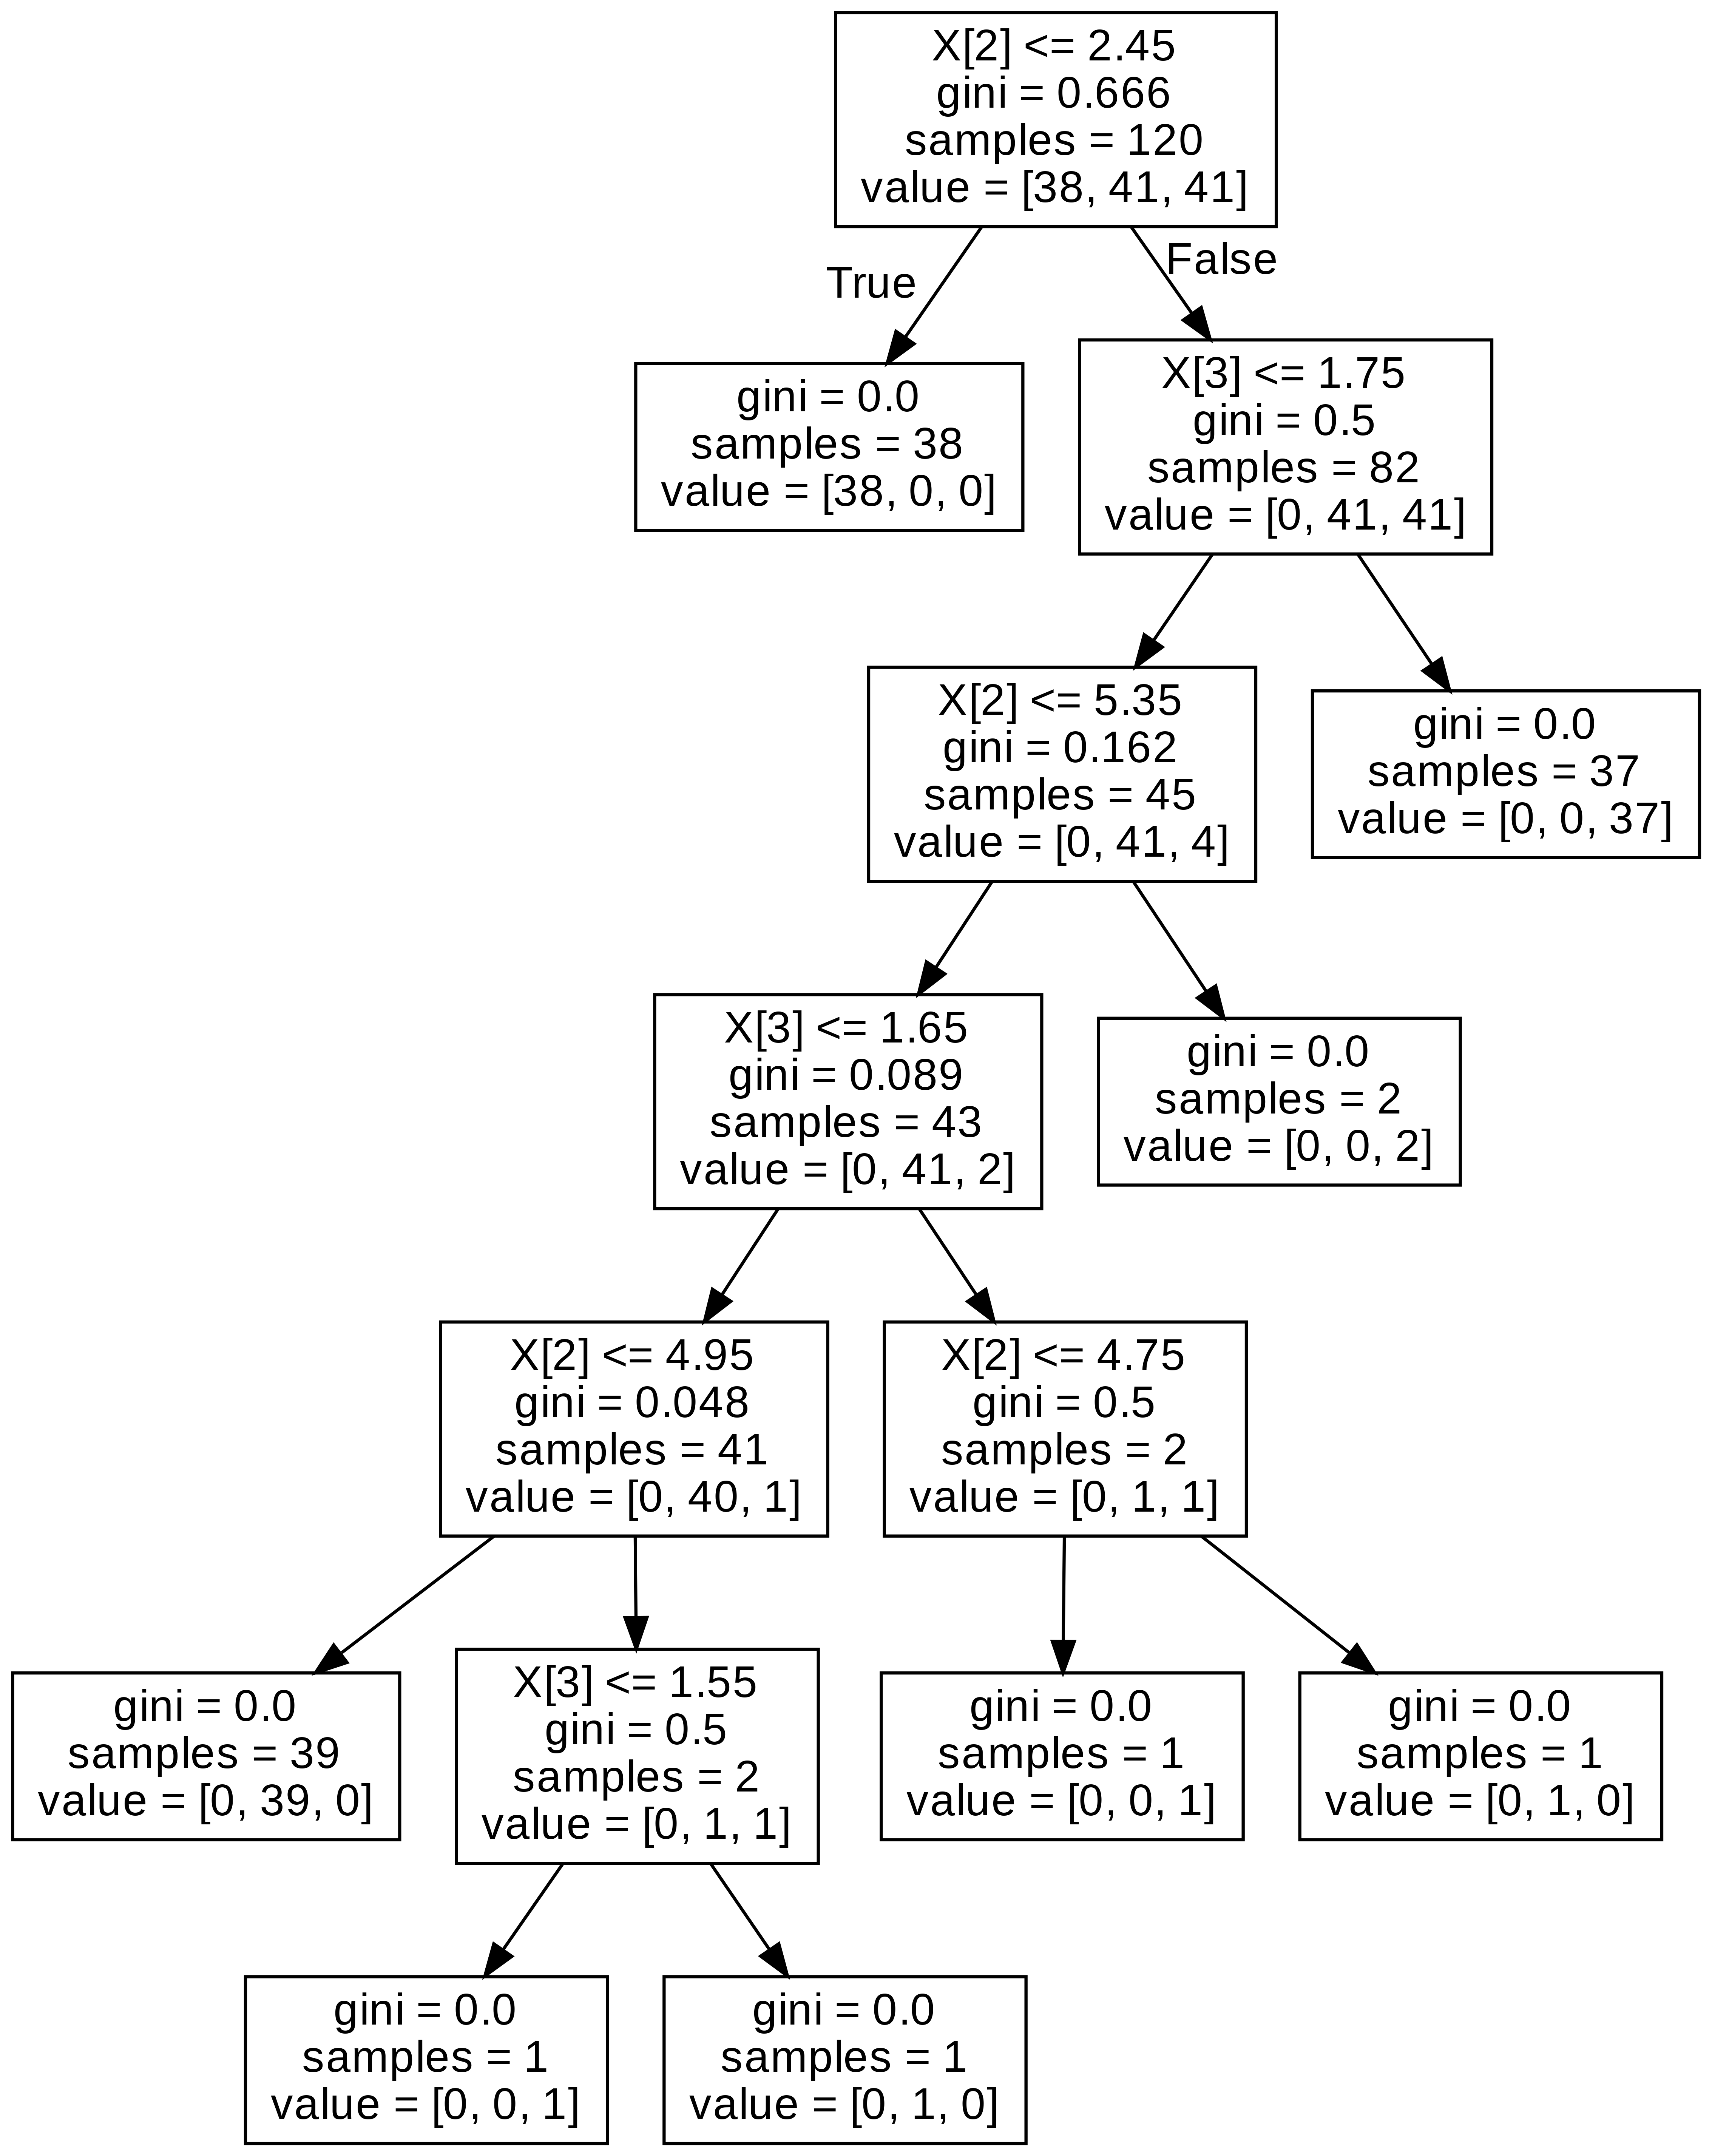

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()



x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=30)


model.fit(x_train, y_train)


pred = model.predict(x_test)


(pred == y_test).mean()


from sklearn.tree import export_graphviz


export_graphviz(model, out_file='tree.dot')

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'forestfires.png', '-Gdpi=600'])


from IPython.display import Image
Image(filename = 'forestfires.png')

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bio

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target) 


AttributeError: ignored

data.month.replace(('1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('월요일','화요일','수요일','목요일','금요일','토요일','일요일'),(1,2,3,4,5,6,7), inplace=True)